In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -R '/content/drive/MyDrive/VU Amsterdam/Year 3/Machine Learning/MLProject/src/data' .

In [ ]:
!cp '/content/drive/MyDrive/VU Amsterdam/3rd Year/Period 4/Machine Learning/data.zip' .

In [ ]:
!unzip data.zip

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow.keras.callbacks as callbacks
#!pip install -q -U keras-tuner
#import keras_tuner as kt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
def getData():

    dir = 'data/'

    df = pd.read_csv(dir + 'labels.csv')

    df['path'] = df['path'].str.replace('\\', os.sep)

    return df

In [ ]:
df = getData()

train_df = df[(df['is_validation'] == 0) & (df['is_final_validation'] == 0)]
valid_df =df[df['is_validation'] == 1]
test_df = df[df['is_final_validation'] == 1 ]

train_cleaned_df = pd.concat( [train_df[train_df['is_bee'] == 1], train_df[train_df['is_wasp'] == 1] ])
valid_cleaned_df = pd.concat( [valid_df[valid_df['is_bee'] == 1], valid_df[valid_df['is_wasp'] == 1] ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [ ]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

train = gen.flow_from_dataframe(train_cleaned_df, directory= 'data/', x_col='path', y_col='label', target_size=(256,256), class_mode='binary')
valid = gen.flow_from_dataframe(valid_cleaned_df, directory= 'data/', x_col='path', y_col='label', target_size=(256,256), class_mode='binary')

Found 5635 validated image filenames belonging to 2 classes.
Found 1234 validated image filenames belonging to 2 classes.


In [ ]:
model = Sequential()
#layer 1
model.add(Conv2D(128, (3,3), padding= 'same', activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(128, (3,3), padding= 'same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(3))
model.add(Dropout(0.3))
#layer 2
model.add(Conv2D(256, (3,3), padding= 'same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(3))
model.add(Dropout(0.3))
#layer 3
model.add(Conv2D(512, (3,3), padding= 'same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(3))
model.add(Dropout(0.4))
#layer 4
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001))) 
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 256, 256, 128)     3584      
                                                                 
 conv2d_29 (Conv2D)          (None, 256, 256, 128)     147584    
                                                                 
 batch_normalization_21 (Bat  (None, 256, 256, 128)    512       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 85, 85, 128)      0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 85, 85, 128)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 85, 85, 256)      

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
history = model.fit(train, epochs=25, batch_size=32, callbacks=[early_stopping], validation_data= valid)


Epoch 1/25
177/177 [==============================] - 64s 356ms/step - loss: 3.5732 - accuracy: 0.7201 - val_loss: 2.4637 - val_accuracy: 0.6994
Epoch 2/25
177/177 [==============================] - 63s 355ms/step - loss: 1.7988 - accuracy: 0.8069 - val_loss: 1.9632 - val_accuracy: 0.7796
Epoch 3/25
177/177 [==============================] - 63s 354ms/step - loss: 1.5731 - accuracy: 0.7938 - val_loss: 1.5994 - val_accuracy: 0.8404
Epoch 4/25
177/177 [==============================] - 63s 355ms/step - loss: 1.3935 - accuracy: 0.8034 - val_loss: 1.5966 - val_accuracy: 0.8250
Epoch 5/25
177/177 [==============================] - 63s 354ms/step - loss: 1.2394 - accuracy: 0.8094 - val_loss: 1.8457 - val_accuracy: 0.7358
Epoch 6/25
177/177 [==============================] - 63s 354ms/step - loss: 1.6273 - accuracy: 0.7853 - val_loss: 1.6166 - val_accuracy: 0.7731
Epoch 7/25
177/177 [==============================] - 63s 354ms/step - loss: 1.5126 - accuracy: 0.7963 - val_loss: 1.2735 - val_ac

In [ ]:
#!mkdir -p cnn_model2
model.save('cnn_model8')

INFO:tensorflow:Assets written to: cnn_model8/assets


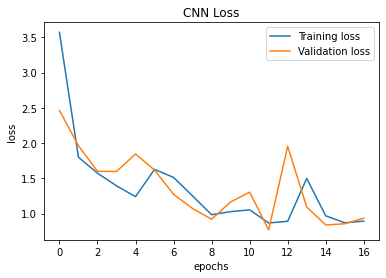

In [ ]:
plt.title('CNN Loss')
plt.plot(history.epoch, history.history['loss'], label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
#plt.savefig('cnn_loss.png')

plt.title('CNN Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='Training acc')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
#plt.savefig('cnn_accuracy.png')